<a href="https://colab.research.google.com/github/kollerbud/House_price_predict/blob/master/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')


In [31]:
import os
import sys

print('pandas version {0}, numpy version {1}, Python version {2},matplotlib version {3}, seaborn version {4}'
      .format(pd.__version__, np.__version__, sys.version, matplotlib.__version__, sns.__version__))


pandas version 0.22.0, numpy version 1.14.6, Python version 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0],matplotlib version 3.0.2, seaborn version 0.7.1


In [32]:

train_url ='https://raw.githubusercontent.com/kollerbud/House_price_predict/master/train.csv'
test_url ='https://raw.githubusercontent.com/kollerbud/House_price_predict/master/test.csv'
df_train =pd.read_csv(train_url, header=0, index_col ='Id')
df_test =pd.read_csv(test_url, header=0, index_col='Id')
print(df_train.head())
print(df_test.head())


    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   M

In [33]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [36]:
print(df_train.shape, df_test.shape)

(1460, 80) (1459, 79)


In [38]:
train_cols =df_train.columns
test_cols =df_test.columns

dif_cols =train_cols.difference(test_cols)
print(dif_cols)
'''
 for fun inspection, in this case the missing column in test data
 is the prediction [SalePrice]
'''

Index(['SalePrice'], dtype='object')


'\n for fun inspection, in this case the missing column in test data\n is the prediction [SalePrice]\n'

In [39]:
# EDA process, understand the data first
df_train.info()
# we see some null data, which will require cleanup and wrangling later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [40]:
# looking into the dependent variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

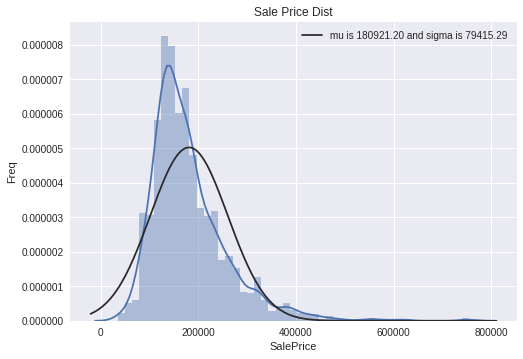

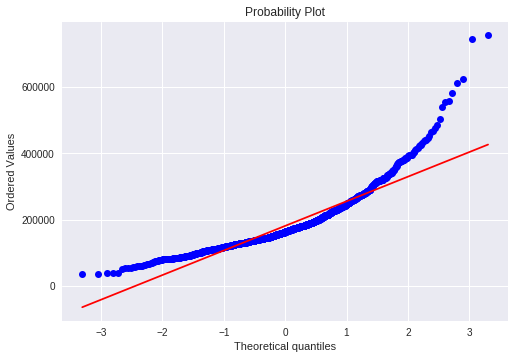

In [41]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df_train['SalePrice'], fit=norm)
mu, sigma =norm.fit(df_train['SalePrice'])

plt.legend(['mu is {0:.2f} and sigma is {1:.2f}'.format(mu, sigma)], loc='best')
plt.ylabel('Freq')
plt.title('Sale Price Dist')

fig =plt.figure()
res =stats.probplot(df_train.SalePrice, plot=plt)
plt.show()

In [42]:
#nice gaussian distribution, but skewed positive to the left
print('the skew is {0:.2f}, and the kurtosis is {1:.2f}'.format(df_train.SalePrice.skew(),df_train.SalePrice.kurt()))

#expected normal dist has skew of 0 and kurtosis of 3

the skew is 1.88, and the kurtosis is 6.54


log mu is 12.02 and log sigma is 0.40
the after skew is 0.12, and the kurtosis is 0.81


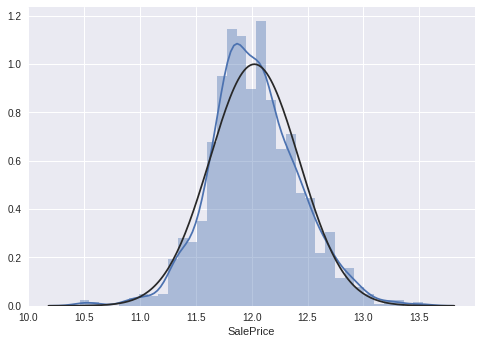

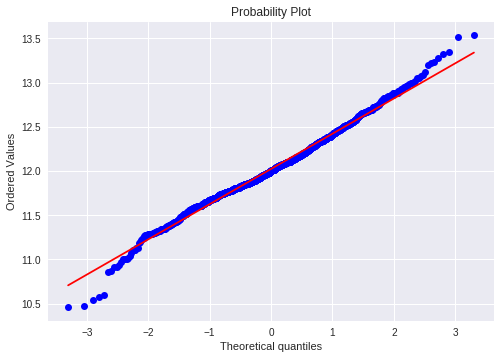

In [43]:
#log transform the data to see whether it will be normal distribution
df_train['SalePrice'] =np.log1p(df_train['SalePrice'])

sns.distplot(df_train.SalePrice, fit=norm)
log_mu, log_sigma = norm.fit(df_train.SalePrice)

fig2 = plt.figure()
res1 =stats.probplot(df_train.SalePrice, plot=plt)


print('log mu is {0:.2f} and log sigma is {1:.2f}'.format(log_mu, log_sigma))
print('the after skew is {0:.2f}, and the kurtosis is {1:.2f}'.format(df_train.SalePrice.skew(),df_train.SalePrice.kurt()))

plt.show()
#normalized

In [44]:
#too many indepedent variables in the dataset, per parsimonious principle,
#need to find the critical components
df_train.corr()
corr1 =df_train.corr()
corr1['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


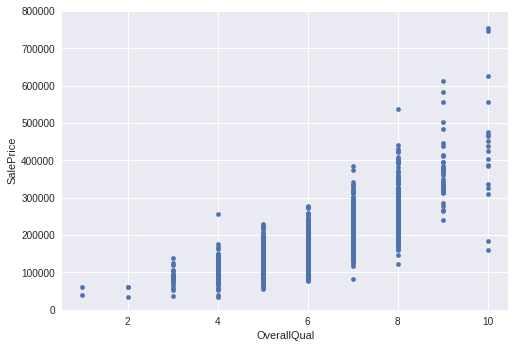

In [45]:
#we can then visualize some of the correlations
var ='OverallQual'
data = pd.concat([np.expm1(df_train.SalePrice), df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


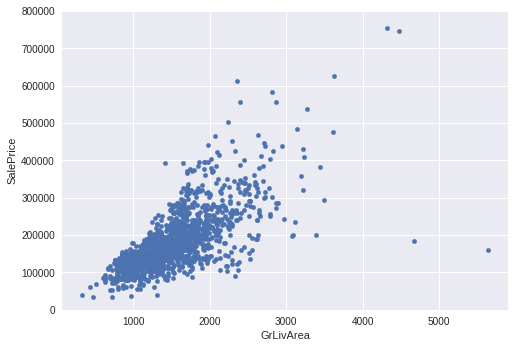

In [46]:
var ='GrLivArea'
data = pd.concat([np.expm1(df_train.SalePrice), df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


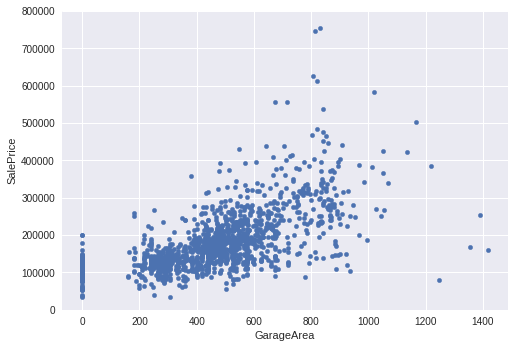

In [47]:
var ='GarageArea'
data = pd.concat([np.expm1(df_train.SalePrice), df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, -1105.0000000000437, 800000)

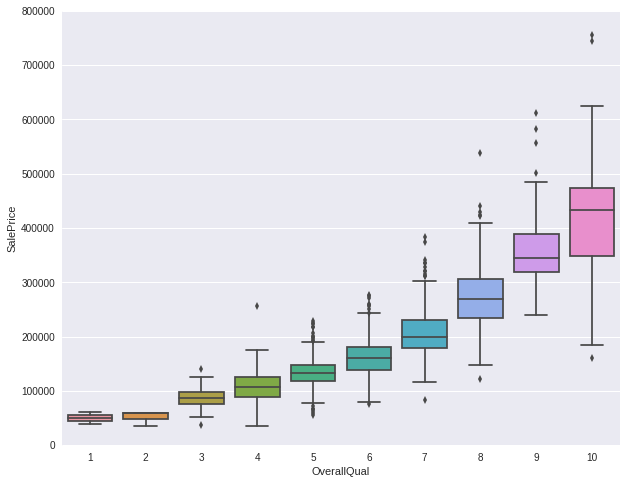

In [48]:
var ='OverallQual'
f, ax =plt.subplots(figsize=(10, 8))
data = pd.concat([np.expm1(df_train.SalePrice), df_train[var]], axis=1)
fig =sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ylim=0, ymax=800000)

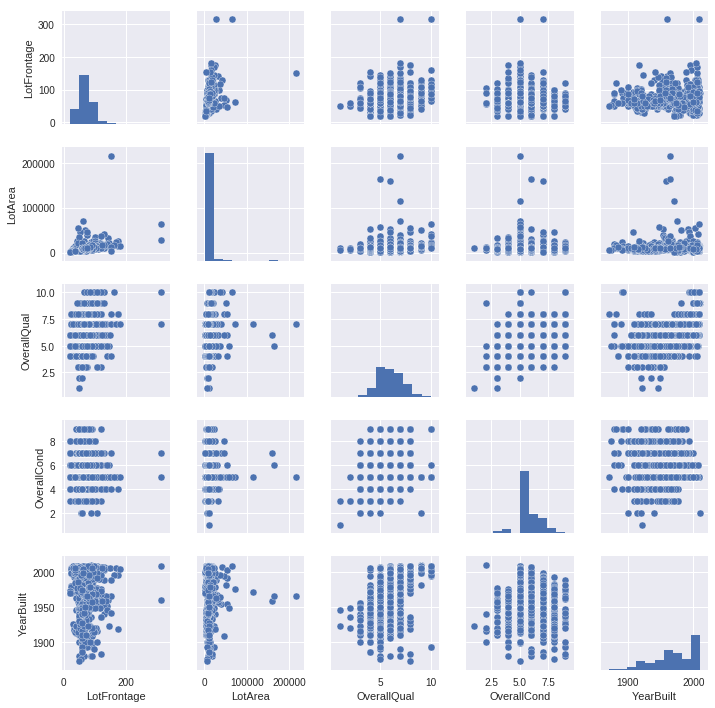

In [49]:
sns.set()
cols = corr1.index[1:6]
sns.pairplot(df_train[cols], size=2)
plt.show()

In [50]:
# baseline model, we ignore categorical data for now, only focus on numerical variables
df_only_num = df_train.select_dtypes(exclude='object')
df_only_num_test =df_test.select_dtypes(exclude='object')

df_only_num.info()
df_only_num_test.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

In [51]:
# figure out which column has missing data
df_only_num.columns[df_only_num.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [52]:
df_only_num[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].sample(10)

for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
  miss_per = len(df_only_num[df_only_num[col].isnull()])/len(df_only_num)
  just_num =df_only_num[col].isnull().sum()
  print(col, miss_per, just_num)

LotFrontage 0.1773972602739726 259
MasVnrArea 0.005479452054794521 8
GarageYrBlt 0.05547945205479452 81


Missing data account for 17% of lot frontage, it would'nt be smart to simply remove them.  Typical method is replace missing value with column average.  Nans from the other columns can be remove.

In [53]:
df_only_num['LotFrontage'].fillna(df_only_num['LotFrontage'].mean(), inplace=True)
df_only_num['LotFrontage'].isnull().sum()

0

In [54]:
df_only_num.dropna(inplace=True)
print(len(df_only_num), len(df_train))


1371 1460


In [55]:

#split train data to test model accuracy
'''
from sklearn.model_selection import train_test_split

num_only_x =df_only_num.drop(['SalePrice'], axis=1)
num_only_y =df_only_num['SalePrice']

num_x_train, num_x_test, num_y_train, num_y_test =train_test_split(num_only_x, num_only_y, train_size=0.75, random_state=2)
'''

"\nfrom sklearn.model_selection import train_test_split\n\nnum_only_x =df_only_num.drop(['SalePrice'], axis=1)\nnum_only_y =df_only_num['SalePrice']\n\nnum_x_train, num_x_test, num_y_train, num_y_test =train_test_split(num_only_x, num_only_y, train_size=0.75, random_state=2)\n"

Feature Selection:
on Scikit-learn doc, there are some good techniques:
1. removing features with low variance
2. univariate feature selection (for regression:
f_regression, mutual_info_regression)
3. recursive methods (forward or backward)
4. feature selection using selectfrommodel

In [0]:
x =df_only_num.loc[:, df_only_num.columns !='SalePrice']
y =df_only_num['SalePrice']

x.shape, y.shape
x.columns

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x, y, train_size=0.75, random_state=3)

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


test =SelectKBest(score_func=f_regression, k=1)
fit =test.fit(x_train, y_train)

np.set_printoptions(precision=2)

sco =pd.DataFrame(fit.scores_, index=x.columns)
sco.sort_values(by=0, ascending=False)

,0
OverallQual,2046.438351
GrLivArea,1062.160309
GarageCars,801.576883
GarageArea,653.685547
FullBath,612.616794
TotalBsmtSF,545.752356
1stFlrSF,505.492981
YearRemodAdd,495.942848
TotRmsAbvGrd,470.811278
YearBuilt,459.024356


Okay we have some basic ideas which feature is important.

https://www.kaggle.com/liyenhsu/feature-selection-and-ensemble-of-5-models
using XGBoost regressor to generate a rank of feature importance


In [64]:
from xgboost import XGBRegressor

xgb =XGBRegressor()
xgb.fit(x_train, y_train)
imp =pd.DataFrame(xgb.feature_importances_, columns=['Importance'], index=x_train.columns)
imp.sort_values(by=['Importance'], ascending=False)


,Importance
GrLivArea,0.105455
LotArea,0.085455
OverallCond,0.074545
BsmtFinSF1,0.074545
YearBuilt,0.063636
LotFrontage,0.056364
GarageYrBlt,0.052727
GarageArea,0.049091
OverallQual,0.047273
TotalBsmtSF,0.041818


Another technique, Lasso regularization
https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf

In [60]:
from sklearn.linear_model import Lasso
from sklearn import metrics
lasso =Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso =lasso.predict(x_test)

print('mse', metrics.mean_squared_error(y_test, y_pred_lasso))
print('rmse', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('R^2', metrics.explained_variance_score(y_pred_lasso, y_test))

mse 0.03570284971661204
rmse 0.18895197727626997
R^2 0.6319390483734908


Lasso model (linear_model) gives about 0.63 R^2 value, meaning 63% of data can be explained by the model

In [29]:
coef_lasso =pd.DataFrame(data=lasso.coef_, index=x_train.columns, columns=['Lasso_Coefficient'])
coef_lasso.sort_values(by='Lasso_Coefficient', ascending=False)

,Lasso_Coefficient
YearBuilt,0.002341
YearRemodAdd,0.001365
GrLivArea,0.000331
GarageArea,0.000291
ScreenPorch,0.000173
TotalBsmtSF,0.000158
WoodDeckSF,0.000142
MasVnrArea,0.000047
BsmtFinSF1,0.000031
OpenPorchSF,0.000028


In [76]:
#using F-stat and p-values
from sklearn.feature_selection import SelectPercentile

selector =SelectPercentile(f_regression, percentile=15)
selector.fit(x_train, y_train)
f =selector.scores_
p =selector.pvalues_
print(x_train.shape, a.shape, p.shape)


(1028, 36) (36,) (36,)


In [83]:
f.reshape(-1,1)
p.reshape(-1,1)
print(f.shape, p.shape)

(36,) (36,)


In [79]:
stat_scores =pd.DataFrame([f, p], columns=['f-score', 'p-values'], index=x_train.columns)
stat_scores

AssertionError: ignored